# Análise de dados com a tragédia do Titanic

CRISPDM

<img src="Artigo-Te%CC%81cnico-CRISP-DM-Diagrama-01-1024x1024.png" width="400">

## Etapas

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação

## 1. Definição do Problema


### Objetivo

1. **Analisar quais variáveis tiveram maior influência na probabilidade de sobrevivência**.

2. **Construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como *input***.


### Métrica de Desempenho

1. Acurácia?


## 2. Obtenção dos Dados

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

**Q1.** Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

## 3. Exploração dos Dados

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável ```Survived``` é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 0.2% de informações faltantes.

In [6]:
train.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

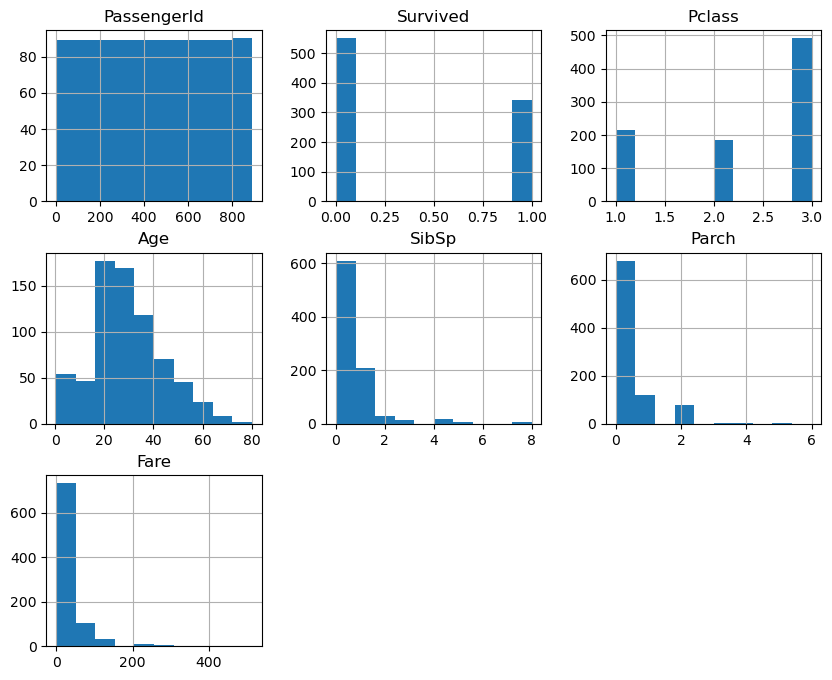

In [8]:
train.hist(figsize = (10,8))



**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [9]:
pd.DataFrame(train.groupby("Sex")['Survived'].mean())

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
train[train['Sex'] == 'male'].shape[0], train[train['Sex'] == 'female'].shape[0]

(577, 314)

<Axes: xlabel='Embarked', ylabel='Survived'>

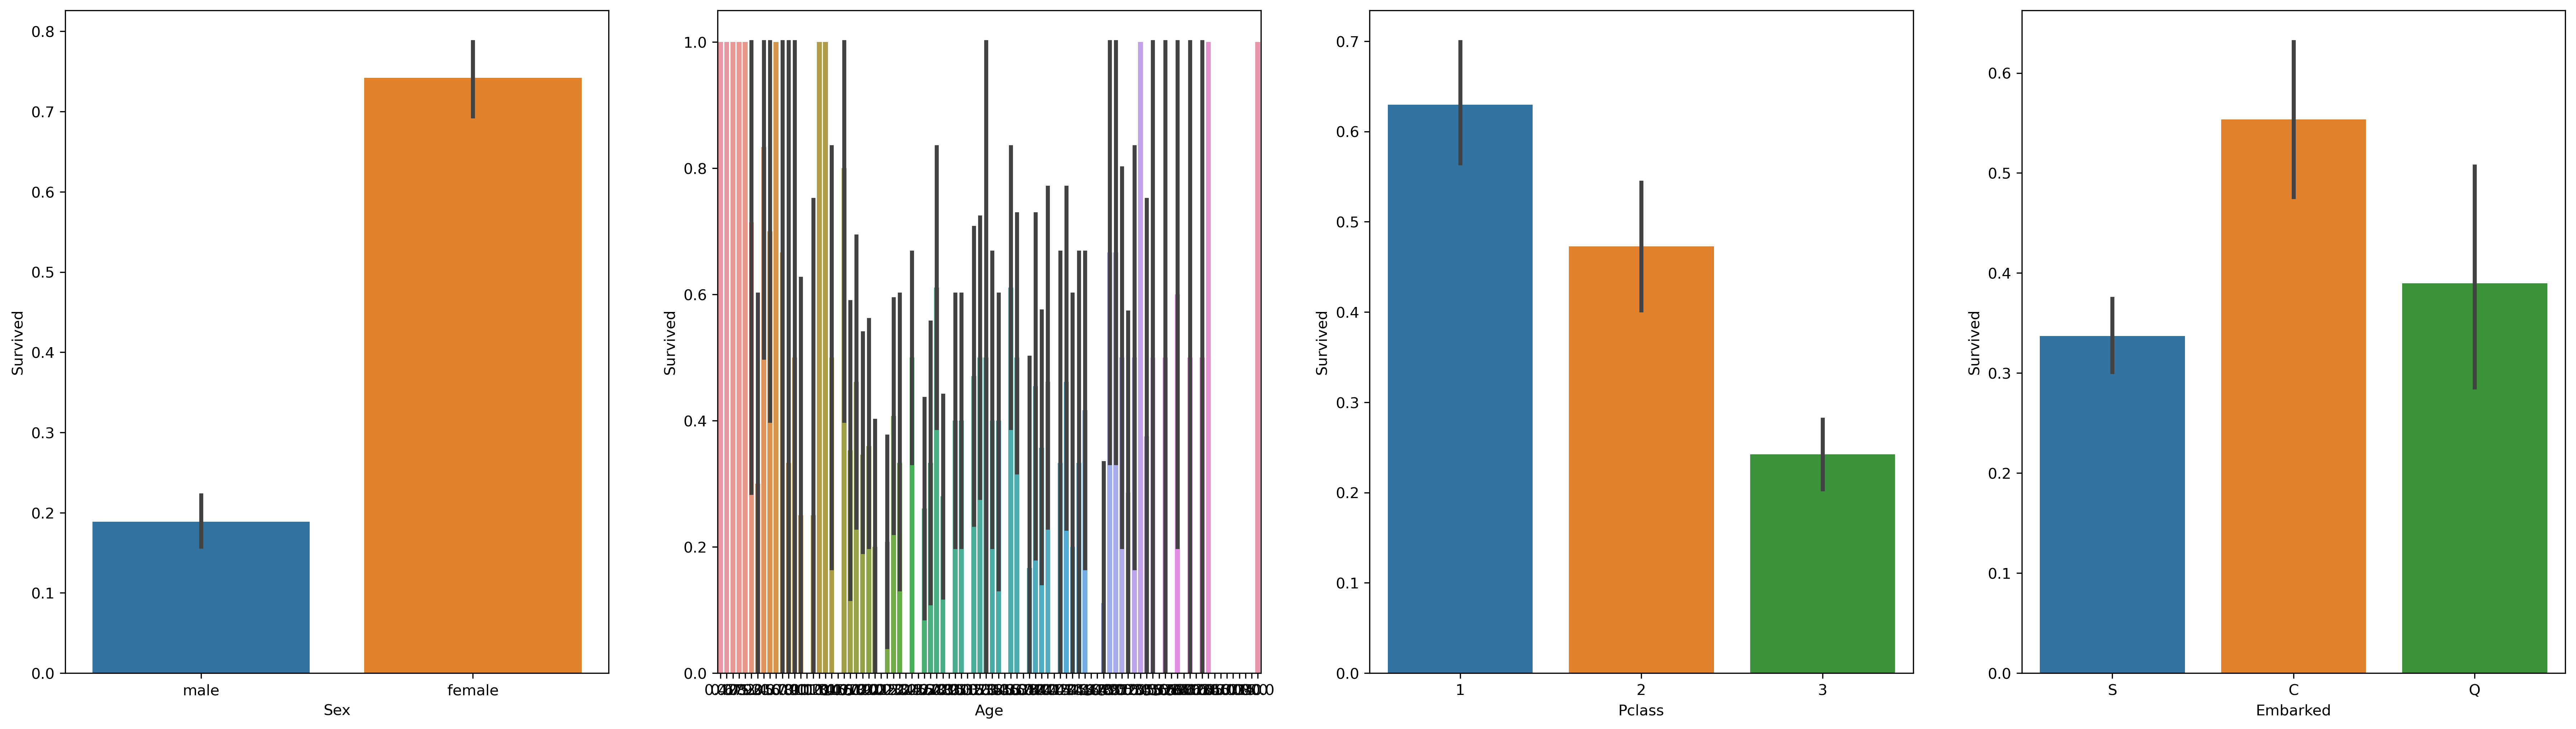

In [11]:
fig, (e1, e2, e3, e4) = plt.subplots(1, 4, figsize = (30,8), dpi = 300)

sns.barplot(data = train, ax = e1, x = 'Sex', y = 'Survived')
sns.barplot(data = train, ax = e2, x = 'Age', y = 'Survived')
sns.barplot(data = train, ax = e3, x = 'Pclass', y = 'Survived')
sns.barplot(data = train, ax = e4, x = 'Embarked', y = 'Survived')

C:\Users\User\AppData\Local\Temp\ipykernel_24352\1061873599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = train.corr()


<Axes: >

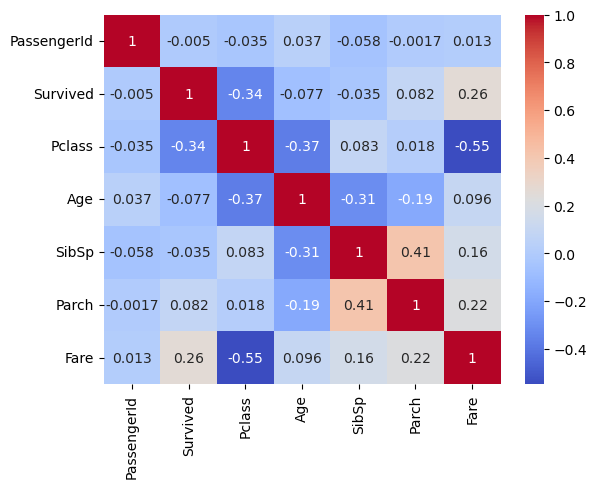

In [12]:
Corr = train.corr()
sns.heatmap(Corr, annot=True, cmap = 'coolwarm')

## 4 Preparação dos Dados


Dica: Separar o target do train.

In [13]:
y = train['Survived']

train.drop(columns = ['Survived'], inplace = True)
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Selecionar as *features*

Dropar porcarias

In [14]:
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

### Valores faltante

Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando a gente encontra *missing values*:
* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
* Excluir a linha inteira.


In [15]:
train.isna().mean()*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [16]:
# Normalmente, eu uso KNNImputer do SKLearn

mediana_age = train['Age'].median()
train['Age'].fillna(mediana_age, inplace = True)
test['Age'].fillna(mediana_age, inplace = True)

In [17]:
fare_age = train['Fare'].median()
train['Fare'].fillna(fare_age, inplace = True)
test['Fare'].fillna(fare_age, inplace = True)

In [18]:
moda_embarked = train['Embarked'].mode()
train['Embarked'].fillna(moda_embarked[0], inplace = True)
test['Embarked'].fillna(moda_embarked[0], inplace = True)

In [19]:
train.isna().mean() * 100, test.isna().mean() * 100

(Pclass      0.0
 Sex         0.0
 Age         0.0
 SibSp       0.0
 Parch       0.0
 Fare        0.0
 Embarked    0.0
 dtype: float64,
 Pclass      0.0
 Sex         0.0
 Age         0.0
 SibSp       0.0
 Parch       0.0
 Fare        0.0
 Embarked    0.0
 dtype: float64)

In [20]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2) 
# imputer.fit_transform(train['Embarked'])

### Preparar as variáveis pro modelo


In [21]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

train['Sex']

# train['Sex'].iloc[0]
# train['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [22]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [24]:
dummies = pd.get_dummies(train['Embarked'])
train = pd.concat([train, dummies],axis = 1)
train.drop(columns = ['Embarked'], inplace = True)
train

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0


In [25]:
dummies = pd.get_dummies(test['Embarked'])
test = pd.concat([test, dummies],axis = 1)
test.drop(columns = ['Embarked'], inplace = True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,28.0,0,0,8.0500,0,0,1


## 5 Construção do Modelo e Avaliação

In [40]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

clf = make_pipeline(RobustScaler(), SVC(gamma='auto'))
# clf = SVC(gamma='auto')

X = train.values

clf = clf.fit(X, y)

In [41]:
clf.score(X, y)

0.8316498316498316

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10).mean()

0.8193133583021224

In [43]:
y_predito = clf.predict(test.values)
y_predito

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,